In [1]:
%config InlineBackend.figure_formats = ['svg']


In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [3]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [4]:
corder = ['C1', 'C2', 'C3', 'C4', 'C0']

In [5]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)

[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Axenic',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [40]:
df_predicted_classes_add = pd.read_csv('monte_add_het_predicted_classes.csv.gz')

In [41]:
df_predicted_classes = pd.read_csv('monte_het_predicted_classes.csv.gz')

In [42]:
problematic_runids = pd.read_csv('problematic_runids_het.txt', names=['run_id'])


In [43]:
problematic_runids_add = pd.read_csv('problematic_runids_add_het.txt', names=['run_id'])


In [53]:
df_predicted_classes['C2N_Het'] = 'ok'
df_predicted_classes.loc[df_predicted_classes.run_id.isin(problematic_runids.run_id), 'C2N_Het'] = 'C2N_too_low'



In [54]:
df_predicted_classes_add['C2N_Het'] = 'ok'
df_predicted_classes_add.loc[df_predicted_classes_add.run_id.isin(problematic_runids_add.run_id), 'C2N_Het'] = 'C2N_too_low'



In [55]:
df_predicted_classes.columns
# ['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model','hash']

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'VPRO_cluster', 'Unnamed: 0', 'Sample', 'full name',
       'Group', 'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'C2N_Het', 'iteration'],
      dtype='object')

In [48]:
df_predicted_classes.VPRO

0        vpro_11_62_EXOENZYME_C1
1        vpro_12_88_EXOENZYME_C2
2         vpro_13_4_EXOENZYME_C3
3         vpro_13_4_EXOENZYME_C3
4        vpro_13_69_EXOENZYME_C1
                  ...           
49293          vpro_93_82_ROS_C1
49294          vpro_96_60_ROS_C1
49295          vpro_96_60_ROS_C1
49296          vpro_97_23_ROS_C1
49297          vpro_97_23_ROS_C1
Name: VPRO, Length: 49298, dtype: object

In [49]:
df_predicted_classes.loc[mask, 'VPRO']

29591    vpro_2_100_31_OVERFLOW
29592    vpro_2_100_31_OVERFLOW
29593     vpro_2_100_5_OVERFLOW
29594     vpro_2_100_5_OVERFLOW
29595     vpro_2_100_5_OVERFLOW
                  ...          
39421      vpro_2_88_4_OVERFLOW
39422     vpro_2_91_13_OVERFLOW
39423     vpro_2_91_13_OVERFLOW
39424     vpro_2_94_87_OVERFLOW
39425     vpro_2_97_16_OVERFLOW
Name: VPRO, Length: 9835, dtype: object

In [56]:
df_predicted_classes_add['iteration'] = 2
df_predicted_classes['iteration'] = 1
df = pd.concat([df_predicted_classes, df_predicted_classes_add], ignore_index=True)

In [57]:
df.groupby(['model', 'iteration', 'C2N_Het']).size()

model      iteration  C2N_Het    
EXOENZYME  1          C2N_too_low    3555
                      ok             6313
           2          C2N_too_low    4545
                      ok             5328
MIN        1          C2N_too_low    7739
                      ok             2125
MIXOTROPH  1          C2N_too_low    7466
                      ok             2393
OVERFLOW   1          C2N_too_low    4934
                      ok             4901
           2          C2N_too_low    9097
                      ok             8667
ROS        1          C2N_too_low    7656
                      ok             2216
           2          C2N_too_low    4556
                      ok             5324
dtype: int64

In [27]:
df

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,VPRO_cluster,...,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled,iteration,C2N_Het
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1,C1,...,6C0,Ruegeria pomeroyi,Sustained,5.163371,50.710373,74.0,261.836489,261.836489,1,NaN
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_12_88_EXOENZYME_C2,C2,...,11A0,Roseovarius 5C3,Weak,4.621448,30.284159,74.0,139.956662,139.956662,1,NaN
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_4_EXOENZYME_C3,C3,...,1B0,Axenic,Axenic,2.342476,52.057268,74.0,121.942887,121.942887,1,NaN
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_4_EXOENZYME_C3,C3,...,1B0,Axenic,Axenic,2.137782,47.880754,74.0,102.358629,102.358629,1,NaN
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1,C1,...,1A0,Axenic,Axenic,10.777020,70.798705,74.0,762.999051,762.999051,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86810,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_962,NaN,...,3B0,Marinobacter adhaerens HP15,Inhibited,4.441409,36.724019,74.0,163.106382,163.106382,2,ok
86811,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_979,NaN,...,10C0,Marinovum 5F3,Weak,8.626213,87.630853,74.0,755.922358,755.922358,2,ok
86812,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_980,NaN,...,5x5_21B0,A. macleodii ATCC27126,Strong,21.008566,163.788072,74.0,3440.952569,3440.952569,2,ok
86813,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535,vpro_19_33_ROS_C0_994,NaN,...,1C0,Axenic,Axenic,9.761028,87.928855,74.0,858.276023,858.276023,2,ok


In [58]:
count_df = df.pivot_table(index=['model', 'iteration'], columns='y_pred', values='run_id', aggfunc='count', fill_value=0
              ).reindex(columns=gorder).reindex(index=morder, level=0)


In [59]:
count_df = (100* count_df.T  / count_df.T.sum()).T

In [60]:
count_df

y_pred                  Strong  Sustained  Inhibited       Weak     Axenic  \
model     iteration                                                          
MIN       1           0.000000   0.000000   0.020276  66.615977  33.363747   
OVERFLOW  1           0.050839   2.419929   0.315201  38.962888  54.600915   
          2           0.112587   1.981536   0.326503  41.432110  52.426255   
MIXOTROPH 1           0.000000   0.000000   0.000000  56.486459  43.513541   
EXOENZYME 1           0.364816  24.229834   0.020268  21.098500  43.818403   
          2           0.911577  13.866099   0.010129  26.010331  50.025322   
ROS       1           2.339951   0.151945   0.141815  81.432334  13.310373   
          2          29.008097   1.417004   0.030364  28.238866   7.489879   

y_pred                   Other  
model     iteration             
MIN       1           0.000000  
OVERFLOW  1           3.650229  
          2           3.721009  
MIXOTROPH 1           0.000000  
EXOENZYME 1          10.468180  
          2           9.176542  
ROS       1           2.623582  
          2          33.815789

In [94]:
count_df2 = df.loc[df.C2N_Het.isin(['ok'])].pivot_table(index=['model', 'iteration'], columns='y_pred', values='run_id', aggfunc='count', fill_value=0
              ).reindex(columns=gorder).reindex(index=morder, level=0)


In [95]:
count_df2 = (count_df2.T  / count_df2.T.sum()).T

In [96]:
count_df2

y_pred                 Strong  Sustained  Inhibited      Weak    Axenic  \
model     iteration                                                       
MIN       1          0.000000   0.000000   0.000941  0.705882  0.293176   
OVERFLOW  1          0.001020   0.037135   0.002857  0.377882  0.541930   
          2          0.002308   0.031268   0.001731  0.412369  0.510788   
MIXOTROPH 1          0.000000   0.000000   0.000000  0.557877  0.442123   
EXOENZYME 1          0.005544   0.275780   0.000158  0.160146  0.415492   
          2          0.014077   0.179992   0.000188  0.202327  0.454204   
ROS       1          0.085740   0.004964   0.000451  0.704422  0.126805   
          2          0.382044   0.018783   0.000188  0.114388  0.052404   

y_pred                  Other  
model     iteration            
MIN       1          0.000000  
OVERFLOW  1          0.039176  
          2          0.041537  
MIXOTROPH 1          0.000000  
EXOENZYME 1          0.142880  
          2          0.149212  
ROS       1          0.077617  
          2          0.432194

In [64]:
sns.set_context('poster', font_scale=3)

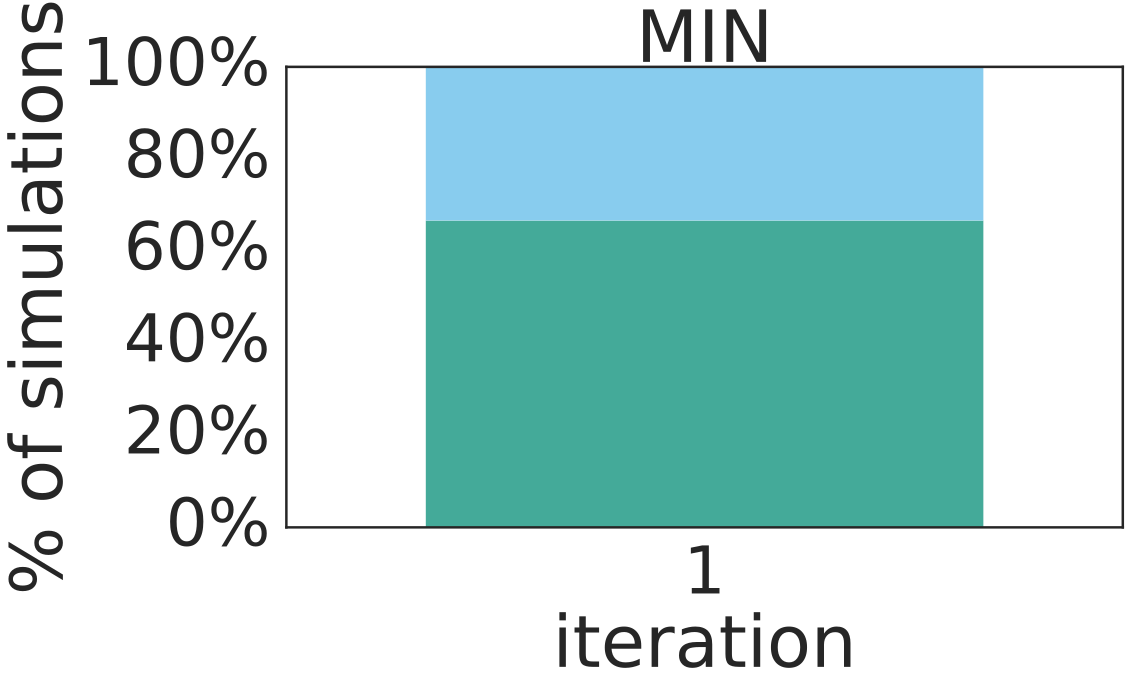

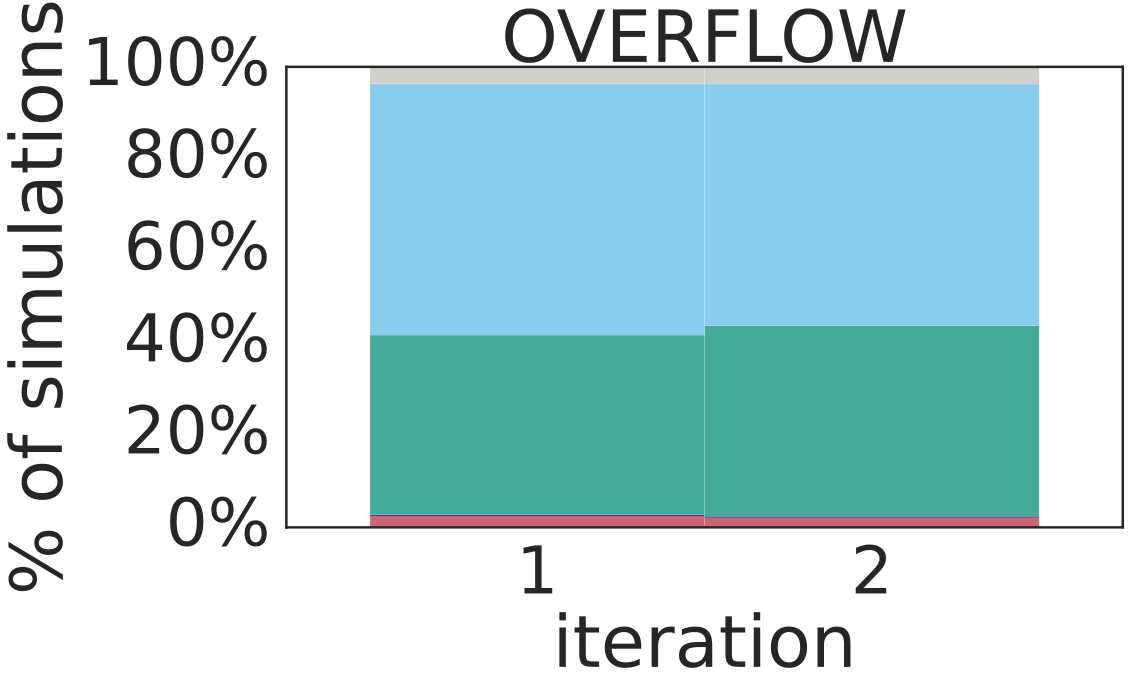

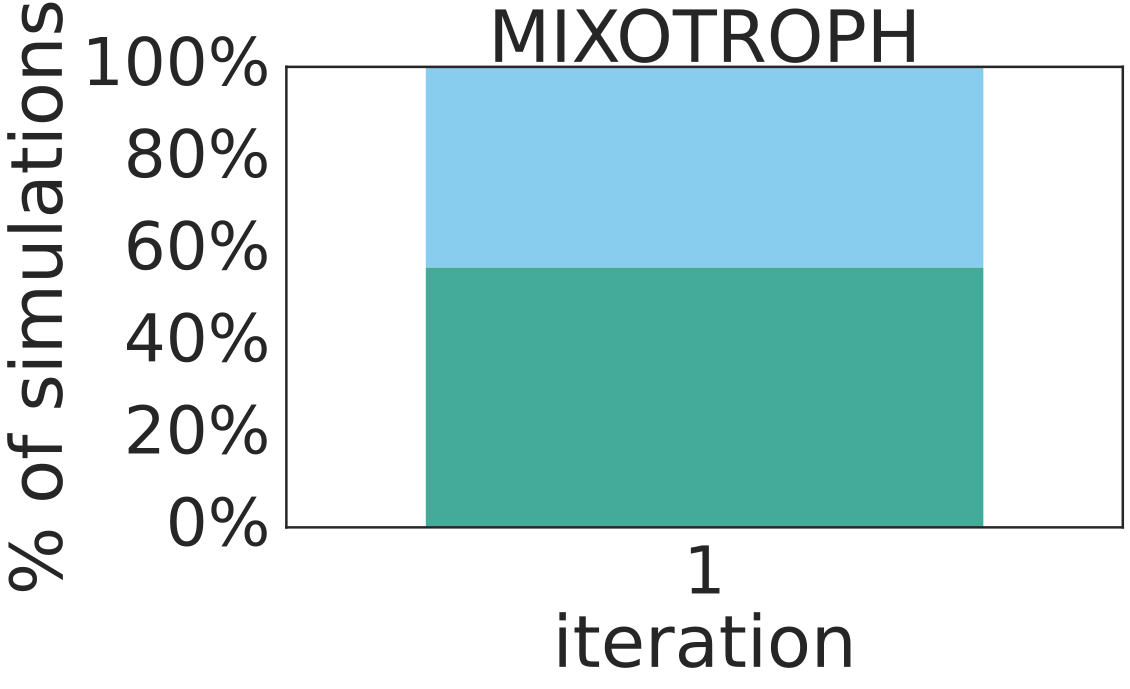

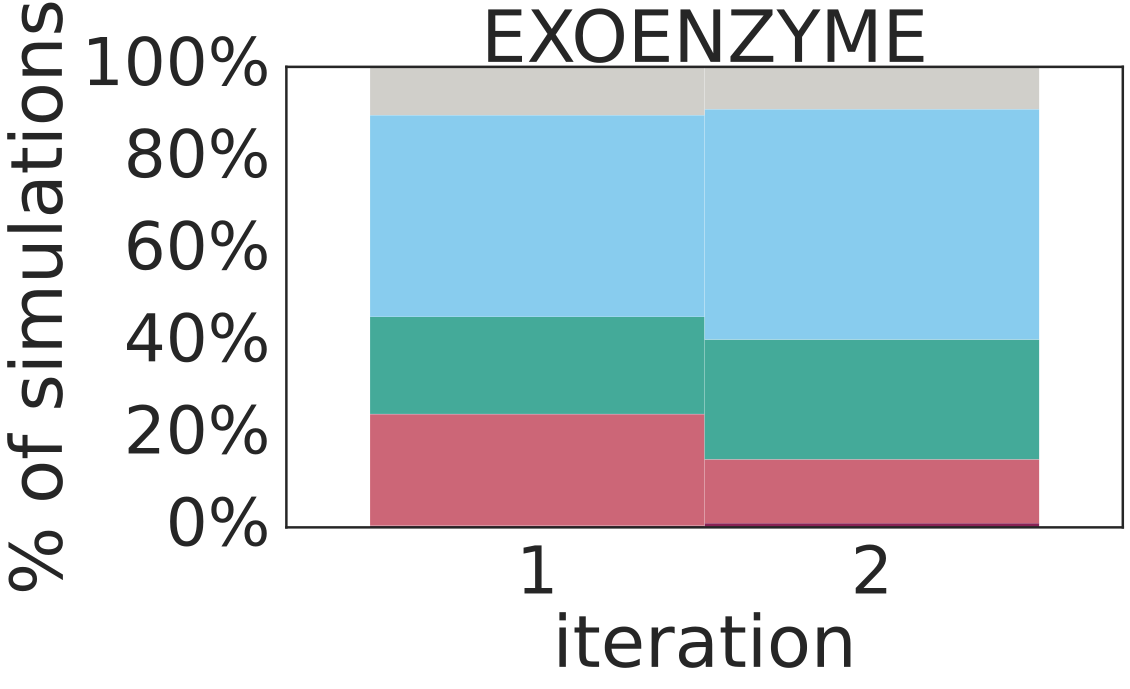

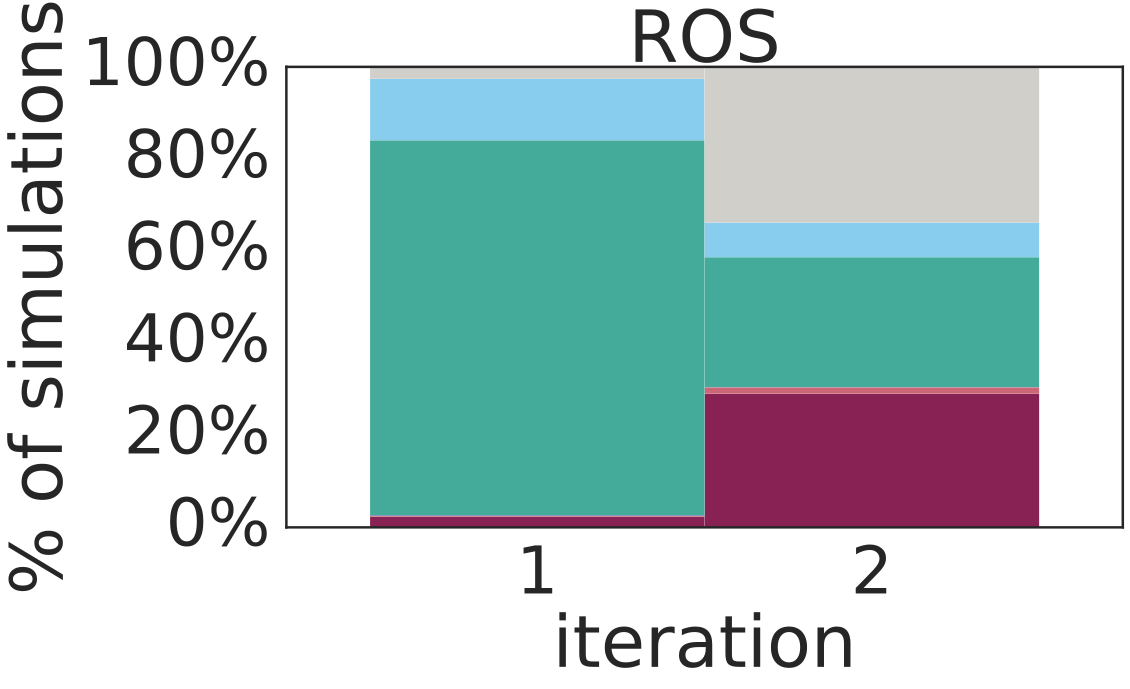

In [65]:
import matplotlib.ticker as mtick

for m in morder:
    cdf = df.loc[df.model.isin([m])].pivot_table(index=['iteration'], columns='y_pred', values='run_id', aggfunc='count', fill_value=0
              ).reindex(columns=gorder)
    cdf = (100* cdf.T  / cdf.T.sum()).T
    
    cdf.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  ylabel='% of simulations', title=m,
             lw=0.1) #fontsize=50)
        
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

In [67]:
pdf = df.loc[
    df.C2N_Het.isin(['ok']) & 
    df.iteration.isin([1]) 
].pivot_table(index='model', columns='y_pred', values='run_id', aggfunc='count', fill_value=0).reindex(index=morder, columns=gorder)
pdf

y_pred,Strong,Sustained,Inhibited,Weak,Axenic,Other
model,,,,,,
MIN,0,0,2,1500,623,0
OVERFLOW,5,182,14,1852,2656,192
MIXOTROPH,0,0,0,1335,1058,0
EXOENZYME,35,1741,1,1011,2623,902
ROS,190,11,1,1561,281,172


In [68]:
pdf.rename(columns={'Axenic':'Neutral'}, inplace=True)

In [70]:
sns.set_context('poster',)# font_scale=3)

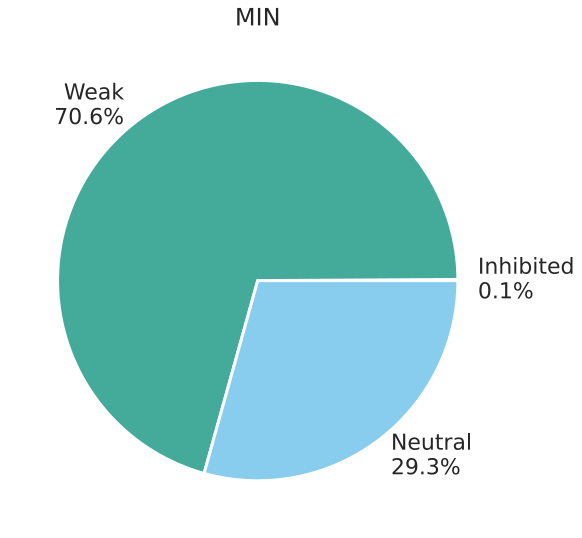

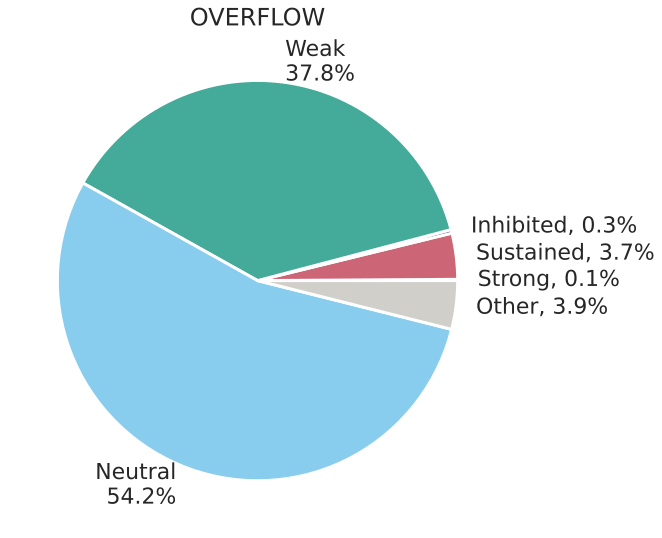

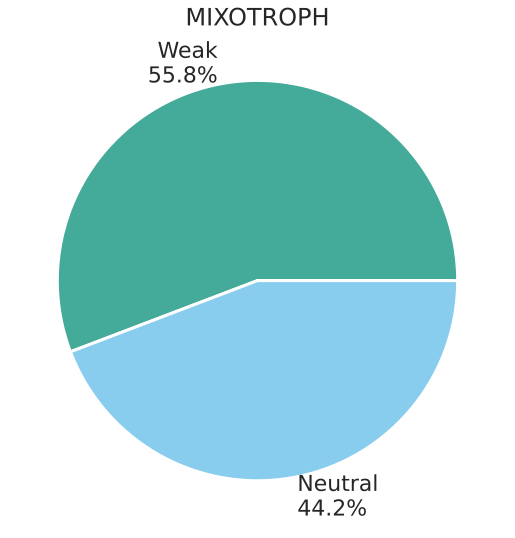

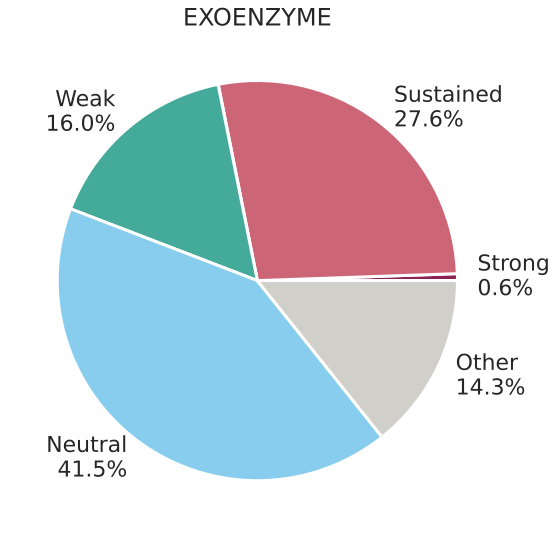

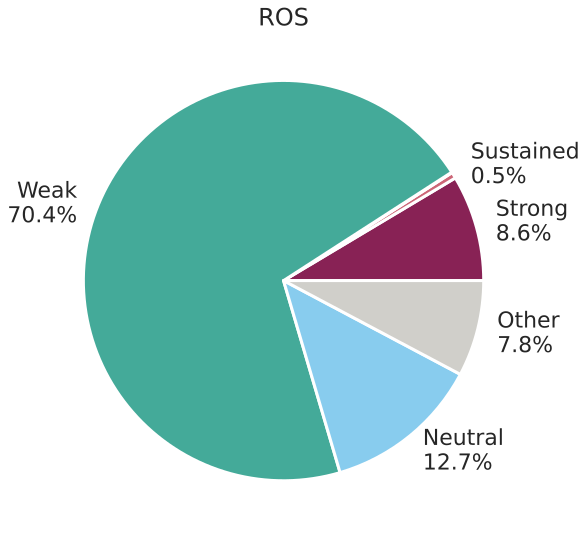

In [73]:
for m in morder:
    fig, ax = plt.subplots()

    _wedges, labels, percentages = ax.pie(pdf.T[m], labels=pdf.columns, autopct='%1.1f%%', colors=gpalette,
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
          )
    for label, percentage in zip(labels, percentages):
        if percentage.get_text() == '0.0%':
            percentage.remove()
            label.remove()
        else:
            if m in ['OVERFLOW'] and label.get_text() in ['Sustained', 'Strong', 'Other', 'Inhibited']:
                label.set_text(label.get_text() + ', ' + percentage.get_text())
            else:
                label.set_text(label.get_text() + '\n' + percentage.get_text())
            percentage.remove()
    plt.title(m)
    plt.tight_layout()
    plt.show()

In [74]:
df.groupby(['model', 'VPRO']).size().describe()

count    1278.000000
mean       67.930360
std        78.614903
min        14.000000
25%        28.000000
50%        33.000000
75%        61.000000
max       372.000000
dtype: float64

In [75]:
df.groupby(['model', 'iteration','VPRO']).y_pred.unique().str.join(',').reset_index().groupby(['model','y_pred']).size().tail(50)

model  y_pred                               
ROS    Other,Axenic,Weak                         7
       Other,Axenic,Weak,Strong                  1
       Other,Axenic,Weak,Strong,Sustained        1
       Other,Strong                              1
       Other,Strong,Axenic                       3
       Other,Strong,Axenic,Sustained,Weak        1
       Other,Strong,Axenic,Weak                  2
       Other,Strong,Axenic,Weak,Sustained        2
       Other,Strong,Sustained                    1
       Other,Strong,Sustained,Axenic             1
       Other,Strong,Sustained,Axenic,Weak        2
       Other,Strong,Sustained,Weak               5
       Other,Strong,Sustained,Weak,Axenic        2
       Other,Strong,Weak                         7
       Other,Strong,Weak,Axenic                  2
       Other,Strong,Weak,Sustained               4
       Other,Sustained,Strong,Axenic,Weak        2
       Other,Weak                                1
       Other,Weak,Axenic             

In [76]:
df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'VPRO_cluster', 'Unnamed: 0', 'Sample', 'full name',
       'Group', 'RMSE_Bptotal[N]', 'RMSE_Bptotal[C]', 'compare_points', 'RMSE',
       'RMSE_filled', 'C2N_Het', 'iteration'],
      dtype='object')

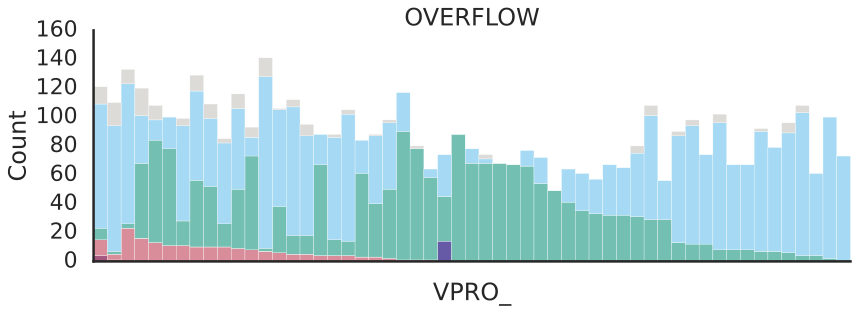

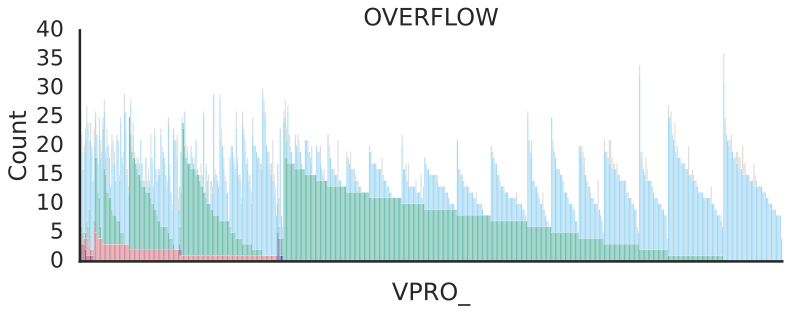

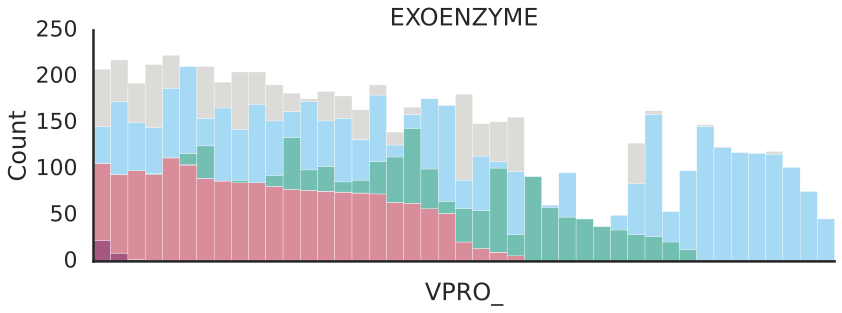

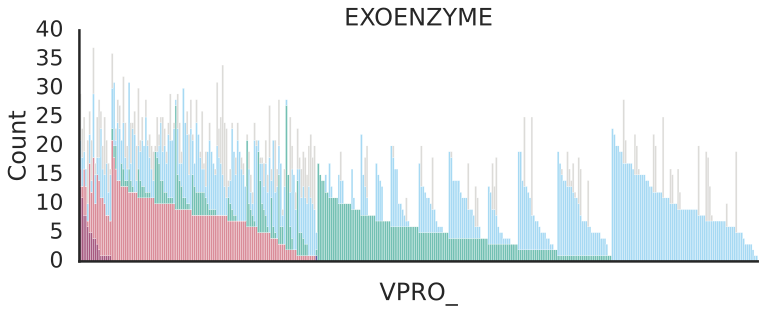

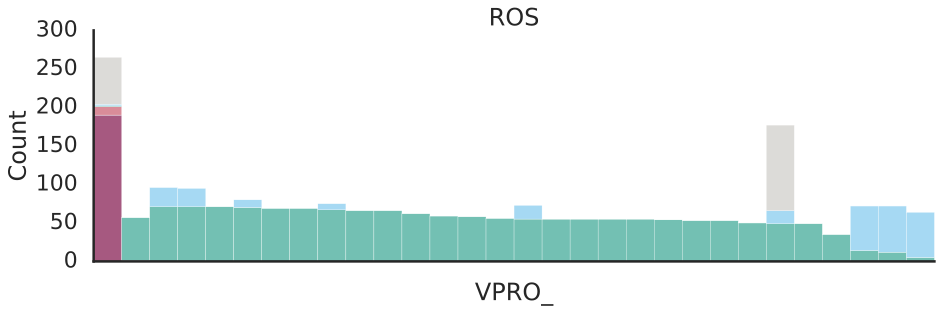

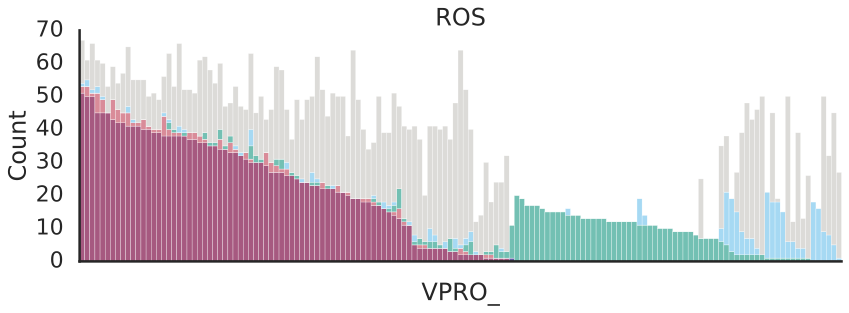

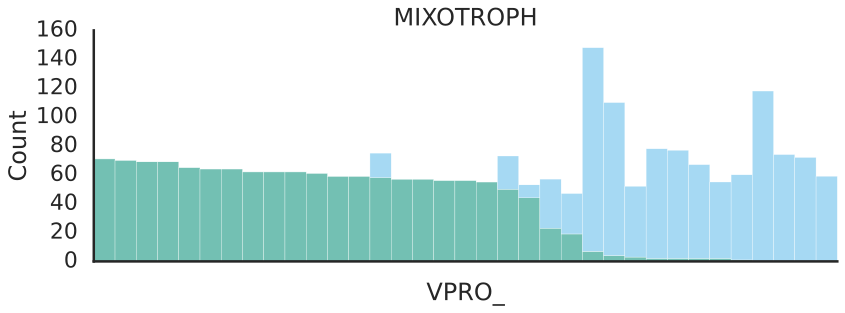

In [78]:
sns.set_context('poster', font_scale=1)
#fig, axs = plt.subplots(2, sharey=True, figsize=(10,5))
for i,m in enumerate(['OVERFLOW', 'EXOENZYME', 'ROS', 'MIXOTROPH']):
    for j in [1,2]:
        t = df.loc[
            df.model.isin([m]) &
            df.iteration.isin([j]) &
            df.C2N_Het.isin(['ok']) 
        
        
                ].copy()
        if t.shape[0]>0:
            tnumdf = t.pivot_table(
                index='VPRO', columns='y_pred', values='model', aggfunc='count', fill_value=0
            )
            #tnumdf = tnumdf.clip(lower=5)
            tnumdf = tnumdf.reindex(columns=gorder)
            tnumdf = tnumdf.sort_values(by=list(tnumdf.columns.to_list()), ascending=False)
            t['VPRO_'] = pd.Categorical(t['VPRO'], tnumdf.index)
            g = sns.displot(
                data=t, lw=0.3,
                hue='y_pred', x='VPRO_',  discrete=True, multiple='stack',
                #hue_order=[gorder[-1]] + gorder[:-1], palette=[gpalette[-1]] + gpalette[:-1],
                hue_order=reversed(gorder), palette=reversed(gpalette),
                #ax=axs[i], 
                aspect=3,
                legend=False,
                
                       )
            plt.title(m)
            g.set(xticklabels=[])

            #g.set_titles(col_template='{col_name}', row_template='{row_name}')
            #axs[i,j].set_title(f'{m} {c}')


In [114]:
vpro_df = df.loc[
            df.C2N_Het.isin(['ok']) 
].pivot_table(
    columns = 'y_pred',
    index=['model', 'iteration', 'VPRO'],
    values='run_id', 
    aggfunc='count', fill_value=0,
)

In [115]:
vpro_df.columns

Index(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'], dtype='object', name='y_pred')

In [116]:
vpro_df['pos_interaction'] = vpro_df.Strong + vpro_df.Sustained
vpro_df['neg_interaction'] = vpro_df.Inhibited + vpro_df.Weak 
vpro_df['Versatile'] = vpro_df['pos_interaction'].ge(1) & vpro_df['neg_interaction'].ge(1) 

In [117]:
vpro_df = vpro_df.reset_index()

In [118]:
vpro_df.pivot_table(
    index='model', columns='iteration', values='Versatile', aggfunc='mean'
)

iteration,1,2
model,,
EXOENZYME,0.441860,0.220994
MIN,0.000000,NaN
MIXOTROPH,0.000000,NaN
OVERFLOW,0.454545,0.239714
ROS,0.033333,0.268456


In [119]:
vpro_df.pivot_table(
    index='model', columns='iteration', values='Versatile', aggfunc='sum'
)

iteration,1,2
model,,
EXOENZYME,19.0,80.0
MIN,0.0,NaN
MIXOTROPH,0.0,NaN
OVERFLOW,25.0,134.0
ROS,1.0,40.0


In [120]:
vpro_df.pivot_table(
    index='model', columns='iteration', values='Versatile', aggfunc='count'
)

iteration,1,2
model,,
EXOENZYME,43.0,362.0
MIN,45.0,NaN
MIXOTROPH,35.0,NaN
OVERFLOW,55.0,559.0
ROS,30.0,149.0


In [121]:
vpro_df.Versatile.value_counts()

Versatile
False    979
True     299
Name: count, dtype: int64

In [112]:
vpro_df.loc[vpro_df.Versatile.isin([False]) & vpro_df.pos_interaction.ge(1)][['model', 'iteration']].value_counts()

model  iteration
ROS    2            25
Name: count, dtype: int64

In [101]:
vpro_df.loc[vpro_df.Versatile.isin([False]) & vpro_df.pos_interaction.ge(1)].describe()


y_pred,iteration,Axenic,Inhibited,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction
count,119.000000,119.000000,119.0,119.000000,119.000000,119.000000,119.0,119.000000,119.0
mean,1.949580,9.857143,0.0,11.201681,12.050420,8.352941,0.0,20.403361,0.0
std,0.219736,15.519963,0.0,12.137335,16.376838,19.693236,0.0,23.583361,0.0
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0
25%,2.000000,1.000000,0.0,3.000000,0.000000,1.000000,0.0,3.000000,0.0
50%,2.000000,5.000000,0.0,8.000000,1.000000,3.000000,0.0,11.000000,0.0
75%,2.000000,12.500000,0.0,13.500000,22.500000,7.000000,0.0,32.500000,0.0
max,2.000000,85.000000,0.0,62.000000,51.000000,112.000000,0.0,112.000000,0.0


In [122]:
vpro_df.to_csv('versatile_vpros.csv')